<a href="https://colab.research.google.com/github/thinhnguyen2026/BUS310/blob/main/Thinh_Nguyen_In_class_Lab3_CV_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries**


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 459.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=37d0ce07b343af95fac288a32e45b3d8268a777677f824137d5cf95386e7f3ee
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting u

## **Load data**

In [3]:
Auto = load_data('Auto')
print(Auto)

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   
...                         ...        ...           ...         ...     ...   
ford mustang gl            27.0          4         140.0          86    2790   
vw pickup                  44.0          4          97.0          52    2130   
dodge rampage              32.0          4         135.0          84    2295   
ford ranger                28.0          4         120.0          79    2625   
chevy s-10                 31.0         

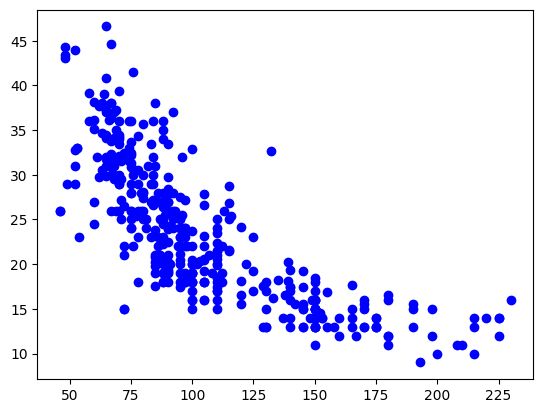

In [4]:
plt.scatter(Auto['horsepower'], Auto['mpg'], color='blue', label='Data points')

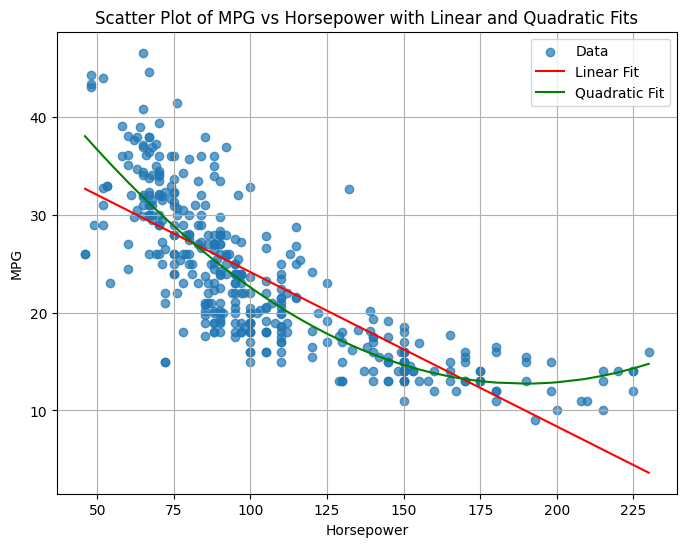

In [10]:
Auto_sorted = Auto.sort_values(by='horsepower')

# Fitting a linear model
coeffs_linear = np.polyfit(Auto_sorted['horsepower'], Auto_sorted['mpg'], 1)
linear_fit = np.polyval(coeffs_linear, Auto_sorted['horsepower'])

# Fitting a quadratic model
coeffs_quadratic = np.polyfit(Auto_sorted['horsepower'], Auto_sorted['mpg'], 2)
quadratic_fit = np.polyval(coeffs_quadratic, Auto_sorted['horsepower'])

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.7,label='Data')

# Make a linear fit
plt.plot(Auto_sorted['horsepower'], linear_fit, color='red', label='Linear Fit')

# Make a quadratic fit
plt.plot(Auto_sorted['horsepower'], quadratic_fit, color='green', label='Quadratic Fit')

# Set labels and title
plt.title('Scatter Plot of MPG vs Horsepower with Linear and Quadratic Fits')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()


## **Data Split**

In [6]:
# This part of code generate the train and test set
Auto_train, Auto_test = train_test_split(Auto,
                                         test_size=196,
                                         random_state=0)  #set random_state can ensure the split will be the same everytime you run the code#


## **Fit the PLS on the training**




In [12]:
# Run linear regression on the training set
X_train = MS(['horsepower']).fit_transform(Auto_train)
y_train = Auto_train['mpg']  # Dependent variable (mpg)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.83e-41
Time:                        00:02:32   Log-Likelihood:                -590.83
No. Observations:                 196   AIC:                             1186.
Df Residuals:                     194   BIC:                             1192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9055      1.009     39.537      0.0

## **Evaluate the model on test set**

In [13]:
x_test = MS(['horsepower']).fit_transform(Auto_test)
y_test = Auto_test['mpg']
test_pred = results.predict(x_test)


## **Compute the MSE**

In [14]:
MSE = np.mean((y_test - test_pred)**2)
print(MSE)

23.61661706966988


## **Pick the order of polynomial**

In [15]:
Auto_train, Auto_test = train_test_split(Auto,
                                         test_size=196,
                                         random_state=0)

## **Loop for polynomial generation**


In [16]:
def evalMSE(terms,
            response,
            train,
            test):

   mm = MS(terms)
   X_train = mm.fit_transform(train)
   y_train = train[response]

   X_test = mm.transform(test)
   y_test = test[response]

   results = sm.OLS(y_train, X_train).fit()
   test_pred = results.predict(X_test)

   return np.mean((y_test - test_pred)**2)

In [17]:
H = np.array(Auto['horsepower'])
M = sklearn_sm(sm.OLS)
MSE=np.zeros(3)
for idx, degree in enumerate(range(1,4)):
    X=np.power.outer(H, np.arange(degree+1))
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_test)
MSE


array([23.61661707, 18.76303135, 18.79694163])

# Answer question "Compare the MSE. Which functional form is the best?"

## The quadratic form is the  best as it has the smalles MSE = 18.76

## **The results shows an improvement for quadratic form**

In [35]:
#range[1, 4] generates a sequence of numbers starting from and going up to
#but not including, 4. So the loop will iterate over the values 1, 2, and 3.
MSE = np.zeros(3)
for idx, degree in enumerate(range(1,4)):
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_test)
MSE

array([23.44264397, 18.5501988 , 18.59522229])

In [34]:
H = np.array(Auto['horsepower'])
M = sklearn_sm(sm.OLS)
Auto_train, Auto_test = train_test_split(Auto,
                                         test_size=196,
                                         random_state=2)

#range(1, 4) generates a sequence of numbers starting from 1 and going up to

## **2. Cross Validation**

n-fold Cross-Validation (LOOCV)

In [22]:
hp_model = sklearn_sm(sm.OLS, MS(['horsepower']))

# Auto.shape[0] gives the number of observation of the data
X,Y = MS(['horsepower']).fit_transform(Auto), Auto['mpg']
cv_results = cross_validate(hp_model,
                            X,
                            Y,
                            cv=Auto.shape[0]) #n fold cross vallidation
print(cv_results)

{'fit_time': array([0.02056813, 0.01110244, 0.01471019, 0.0088141 , 0.04025364,
       0.01474142, 0.01557541, 0.02149391, 0.01670551, 0.01504636,
       0.01434016, 0.01574755, 0.01463461, 0.01468945, 0.01973391,
       0.0067904 , 0.00725698, 0.00707722, 0.00654936, 0.00664091,
       0.00664043, 0.00667262, 0.00665832, 0.00656295, 0.00720882,
       0.0067699 , 0.00686526, 0.00675201, 0.00676513, 0.00687861,
       0.00660372, 0.00707793, 0.00674582, 0.00705123, 0.00777173,
       0.00738811, 0.00722861, 0.00722289, 0.00679564, 0.00678444,
       0.00706577, 0.00679898, 0.00982022, 0.00693679, 0.00730515,
       0.00690007, 0.0066731 , 0.00681543, 0.01530695, 0.00731707,
       0.00714445, 0.00716639, 0.00815964, 0.0077734 , 0.00738549,
       0.00718689, 0.00718522, 0.00741696, 0.00777078, 0.00745583,
       0.00770283, 0.00740838, 0.00730085, 0.00734186, 0.0074532 ,
       0.00713563, 0.00726509, 0.00810194, 0.00782228, 0.00689292,
       0.00593615, 0.00448132, 0.00450945, 0.0045

In [23]:
cv_err = np.mean(cv_results['test_score'])
print(cv_err)

24.23151351792922


In [24]:
Auto.shape[0]

392

In [29]:
cv_error = np.zeros(5)
H = np.array(Auto['horsepower'])
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1)) #polynomial feature generation
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=Auto.shape[0]) #LOOCV N-fold cross validation
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error


array([24.23151352, 19.24821312, 19.33498406, 19.42443029, 19.03320648])

## **10 fold cross validation**

In [30]:
cv_error = np.zeros(5)
cv = KFold(n_splits=10,
           shuffle=True,
           random_state=20) # use same splits for each degree
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=cv)
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([24.24809835, 19.44593146, 19.57287186, 19.65952645, 19.12821126])

In [33]:
validation = ShuffleSplit(n_splits=10,
                         test_size=196,
                         random_state=0)
results = cross_validate(hp_model,
                         Auto.drop(['mpg'], axis = 1),
                         Auto['mpg'],
                         cv=validation)
results['test_score'].mean(), results['test_score'].std()

(23.802232661034168, 1.4218450941091842)